In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
from postprocess import postprocess_dir
import os
import matplotlib.pyplot as plt
import numpy as np
import pdb

In [4]:
os.chdir('C:\\Users\\Ankit\\nse\\uoicorr')
en = postprocess_dir('01102019')

In [5]:
en.shape

(120, 10)

In [6]:
en.iloc[0]

beta             [[3.7378327211461446, 4.365038055859901, 4.512...
beta_hats        [[5.114142626627204, 0.0, 9.98663198969145, 6....
block_size                                                       6
correlation                                                      0
fn               [14.0, 10.0, 17.0, 10.0, 12.0, 11.0, 13.0, 14....
fp               [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
r2               [0.6616823931519236, 0.740443101008586, 0.7543...
r2_true          [[0.7718071091991716, 0.7736094510292274, 0.77...
sel_thres_min                                                    1
sparsity                                                         1
Name: 0, dtype: object

Plots to create: 

* Typical selection profiles across block sizes, sparsity, and correlation strengths (verify functioning, not necessarily to report)
* False negative rate as a function of block size and correlation strength
* False negative rate vs. false positive rate for different sparsity, block size, and correlation strength
* R^2 performance as function of sparsity, block size, and correlation strength



# Typical Selection Profiles

In [7]:
en02 = en.loc[(en['sparsity'] == 1) & (en['block_size'] == 6)]

In [8]:
os.chdir('C:\\Users\\Ankit\\nse\\uoicorr')

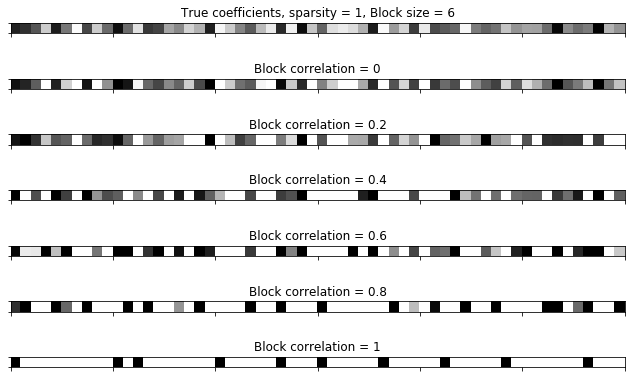

In [9]:
fig, ax = plt.subplots(7, 1, figsize=(11, 7))
# True beta
ax[0].set_aspect('equal')
ax[0].pcolor(en02.iloc[0].beta[1, :, np.newaxis].T, cmap='Greys', vmin = 0, vmax = 10)
ax[0].set_xticklabels([])
ax[0].set_yticklabels([])
ax[0].set_title('True coefficients, sparsity = 1, Block size = 6')

ax[1].set_aspect('equal')
ax[1].pcolor(en02.iloc[0].beta_hats[1, :, np.newaxis].T, cmap = 'Greys', vmin = 0, vmax = 10)
ax[1].set_xticklabels([])
ax[1].set_yticklabels([])
ax[1].set_title('Block correlation = 0')

ax[2].set_aspect('equal')
ax[2].pcolor(en02.iloc[1].beta_hats[1, :, np.newaxis].T, cmap = 'Greys', vmin = 0, vmax = 10)
ax[2].set_xticklabels([])
ax[2].set_yticklabels([])
ax[2].set_title('Block correlation = 0.2')

ax[3].set_aspect('equal')
ax[3].pcolor(en02.iloc[2].beta_hats[1, :, np.newaxis].T, cmap = 'Greys', vmin = 0, vmax = 10)
ax[3].set_xticklabels([])
ax[3].set_yticklabels([])
ax[3].set_title('Block correlation = 0.4')

ax[4].set_aspect('equal')
ax[4].pcolor(en02.iloc[3].beta_hats[1, :, np.newaxis].T, cmap = 'Greys', vmin = 0, vmax = 10)
ax[4].set_xticklabels([])
ax[4].set_yticklabels([])
ax[4].set_title('Block correlation = 0.6')

ax[5].set_aspect('equal')
ax[5].pcolor(en02.iloc[4].beta_hats[1, :, np.newaxis].T, cmap = 'Greys', vmin = 0, vmax = 10)
ax[5].set_xticklabels([])
ax[5].set_yticklabels([])
ax[5].set_title('Block correlation = 0.8')

ax[6].set_aspect('equal')
ax[6].pcolor(en02.iloc[5].beta_hats[1, :, np.newaxis].T, cmap = 'Greys', vmin = 0, vmax = 10)
ax[6].set_xticklabels([])
ax[6].set_yticklabels([])
ax[6].set_title('Block correlation = 1')

plt.savefig('selection_profile.png')

## False negative rate

In [10]:
# Stick to LST 1, make separate curves for each block size, and plot FNR as a function of correlation 

# Select the relevant data:
dat = []
dat.append(en.loc[(en['sparsity'] == 0.2) & (en['sel_thres_min'] == 1)])
dat.append(en.loc[(en['sparsity'] == 0.4) & (en['sel_thres_min'] == 1)])
dat.append(en.loc[(en['sparsity'] == 0.6) & (en['sel_thres_min'] == 1)])
dat.append(en.loc[(en['sparsity'] == 0.8) & (en['sel_thres_min'] == 1)])
dat.append(en.loc[(en['sparsity'] == 1) & (en['sel_thres_min'] == 1)])

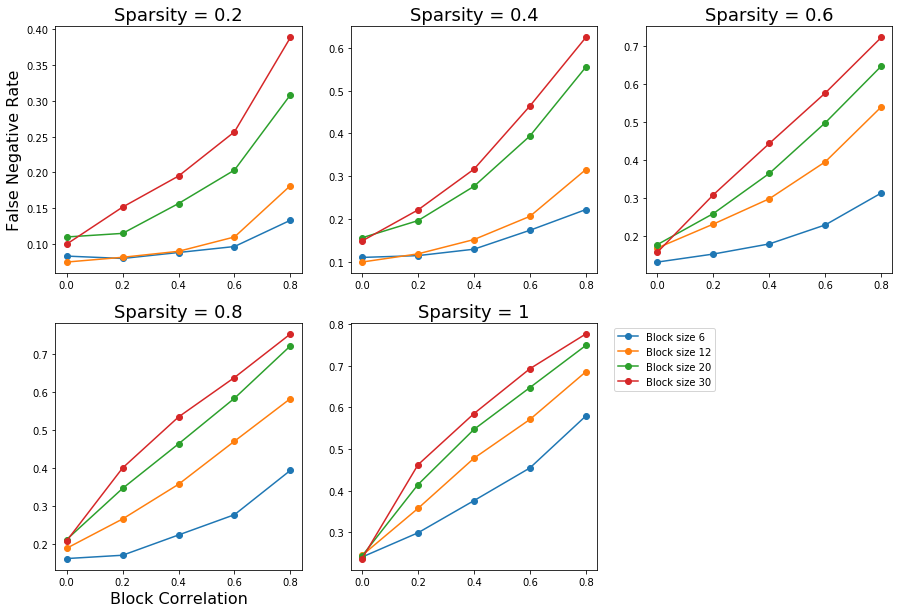

In [11]:
correlations = [0, 0.2, 0.4, 0.6, 0.8]
block_size = [6, 12, 20, 30]
sparsity = [0.2, 0.4, 0.6, 0.8, 1]
fig, ax = plt.subplots(2, 3, figsize = (15, 10))
for i, d in enumerate(dat):
    # Organize by block_size and correlations
    fn_avg = np.zeros((len(block_size), len(correlations)))
    for j, b in enumerate(block_size):
        for k, c in enumerate(correlations):
        # For each instance, average across repititions
            dd = d.loc[(d['correlation'] == c) & (d['block_size'] == b)]
            fn_avg[j, k] = np.mean(dd.fn.values[0])/(60 * sparsity[i])
    a = ax[np.unravel_index(i, (2, 3))]
    a.plot(correlations, fn_avg[0, :], '-o')
    a.plot(correlations, fn_avg[1, :], '-o')
    a.plot(correlations, fn_avg[2, :], '-o')
    a.plot(correlations, fn_avg[3, :], '-o')

fig.delaxes(ax[1, 2])
ax[np.unravel_index(0, (2, 3))].set_title('Sparsity = 0.2', fontsize=18)
ax[np.unravel_index(0, (2, 3))].set_ylabel('False Negative Rate', fontsize=16)
ax[np.unravel_index(1, (2, 3))].set_title('Sparsity = 0.4', fontsize=18)
ax[np.unravel_index(2, (2, 3))].set_title('Sparsity = 0.6', fontsize=18)
ax[np.unravel_index(3, (2, 3))].set_title('Sparsity = 0.8', fontsize=18)
ax[np.unravel_index(3, (2, 3))].set_xlabel('Block Correlation', fontsize=16)
ax[np.unravel_index(4, (2, 3))].set_title('Sparsity = 1', fontsize=18)
ax[np.unravel_index(4, (2, 3))].legend(['Block size 6', 'Block size 12', 'Block size 20', 'Block size 30'], loc = 'upper right', bbox_to_anchor=(1.5, 1))
plt.savefig('FalseNegativeRate.png')

## False positive rate

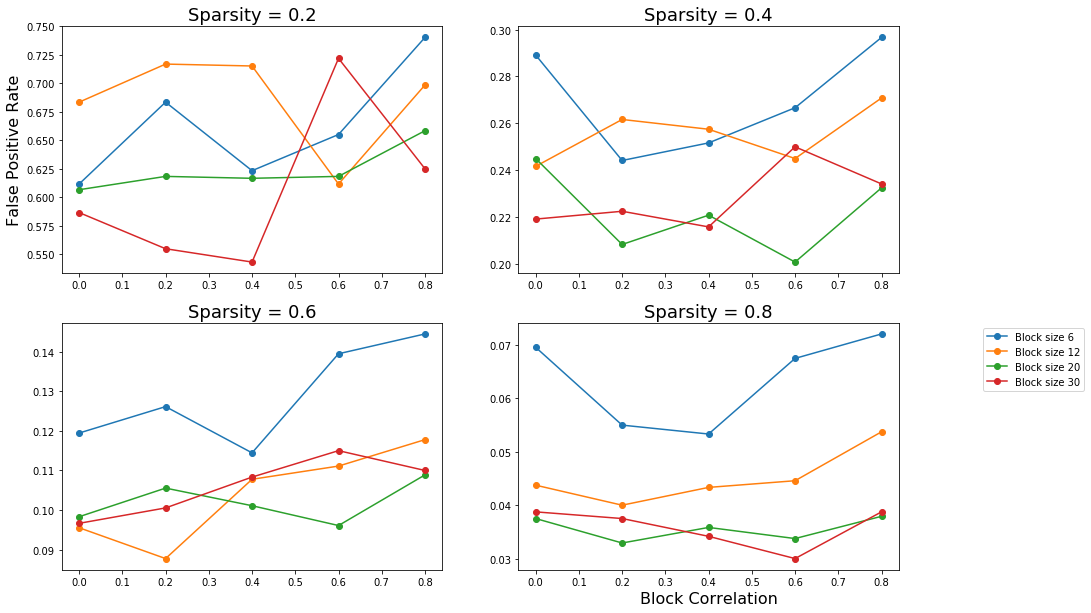

In [14]:
correlations = [0, 0.2, 0.4, 0.6, 0.8]
block_size = [6, 12, 20, 30]
sparsity = [0.2, 0.4, 0.6, 0.8]
fig, ax = plt.subplots(2, 2, figsize = (15, 10))
for i, s in enumerate(sparsity):
    d = dat[i]
    # Organize by block_size and correlations
    fn_avg = np.zeros((len(block_size), len(correlations)))
    fp_avg = np.zeros((len(block_size), len(correlations)))
    for j, b in enumerate(block_size):
        for k, c in enumerate(correlations):
        # For each instance, average across repititions
            dd = d.loc[(d['correlation'] == c) & (d['block_size'] == b)]
            fp_avg[j, k] = np.mean(dd.fp.values[0])/(60 * s)
    a = ax[np.unravel_index(i, (2, 2))]
    a.plot(correlations, fp_avg[0, :], '-o')
    a.plot(correlations, fp_avg[1, :], '-o')
    a.plot(correlations, fp_avg[2, :], '-o')
    a.plot(correlations, fp_avg[3, :], '-o')            
    
ax[np.unravel_index(0, (2, 2))].set_title('Sparsity = 0.2', fontsize=18)
ax[np.unravel_index(0, (2, 2))].set_ylabel('False Positive Rate', fontsize=16)
ax[np.unravel_index(1, (2, 2))].set_title('Sparsity = 0.4', fontsize=18)
ax[np.unravel_index(2, (2, 2))].set_title('Sparsity = 0.6', fontsize=18)
ax[np.unravel_index(3, (2, 2))].set_title('Sparsity = 0.8', fontsize=18)
ax[np.unravel_index(3, (2, 2))].set_xlabel('Block Correlation', fontsize=16)
ax[np.unravel_index(3, (2, 2))].legend(['Block size 6', 'Block size 12', 'Block size 20', 'Block size 30'], loc = 'upper right', bbox_to_anchor=(1.5, 1))
plt.savefig('FalsePositiveRate.png')

## R^2 as a function of sparsity, block size, and correlation strength

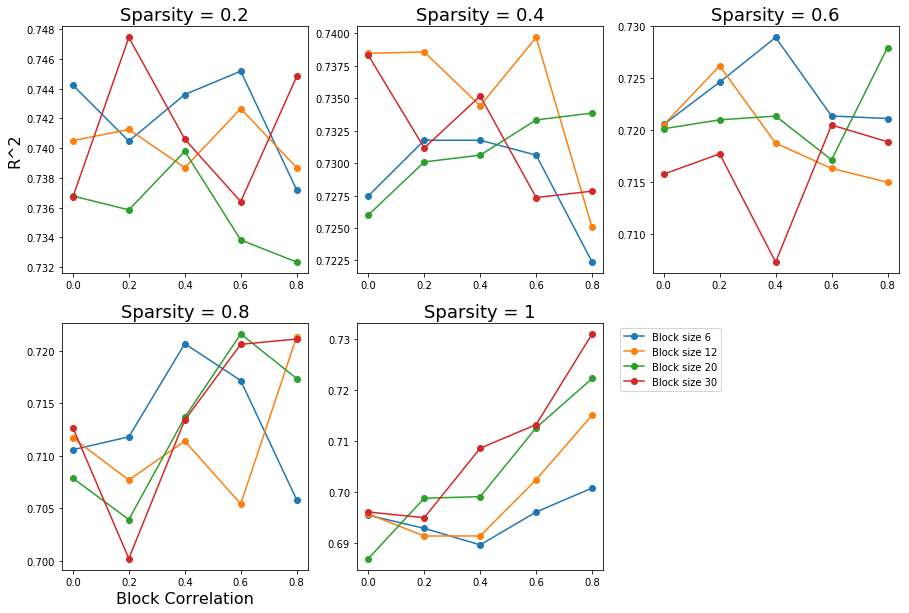

In [15]:
correlations = [0, 0.2, 0.4, 0.6, 0.8]
block_size = [6, 12, 20, 30]
sparsity = [0.2, 0.4, 0.6, 0.8, 1]
fig, ax = plt.subplots(2, 3, figsize = (15, 10))
for i, d in enumerate(dat):
    # Organize by block_size and correlations
    fn_avg = np.zeros((len(block_size), len(correlations)))
    fp_avg = np.zeros((len(block_size), len(correlations)))
    for j, b in enumerate(block_size):
        for k, c in enumerate(correlations):
        # For each instance, average across repititions
            dd = d.loc[(d['correlation'] == c) & (d['block_size'] == b)]
            fp_avg[j, k] = np.mean(dd.r2.values[0])
    a = ax[np.unravel_index(i, (2, 3))]
    a.plot(correlations, fp_avg[0, :], '-o')
    a.plot(correlations, fp_avg[1, :], '-o')
    a.plot(correlations, fp_avg[2, :], '-o')
    a.plot(correlations, fp_avg[3, :], '-o')            
    
fig.delaxes(ax[1, 2])
ax[np.unravel_index(0, (2, 3))].set_title('Sparsity = 0.2', fontsize=18)
ax[np.unravel_index(0, (2, 3))].set_ylabel('R^2', fontsize=16)
ax[np.unravel_index(1, (2, 3))].set_title('Sparsity = 0.4', fontsize=18)
ax[np.unravel_index(2, (2, 3))].set_title('Sparsity = 0.6', fontsize=18)
ax[np.unravel_index(3, (2, 3))].set_title('Sparsity = 0.8', fontsize=18)
ax[np.unravel_index(3, (2, 3))].set_xlabel('Block Correlation', fontsize=16)
ax[np.unravel_index(4, (2, 3))].set_title('Sparsity = 1', fontsize=18)
ax[np.unravel_index(4, (2, 3))].legend(['Block size 6', 'Block size 12', 'Block size 20', 'Block size 30'], loc = 'upper right', bbox_to_anchor=(1.5, 1))
plt.savefig('R2.png')

### Repeat for UoI Elastic Net

In [16]:
os.chdir('C:\\Users\\Ankit\\nse\\uoicorr')
en2 = postprocess_dir('01102019b')

In [17]:
en2.shape

(120, 10)

In [20]:
en02 = en.loc[(en2['sparsity'] == 0.4) & (en2['block_size'] == 6)]

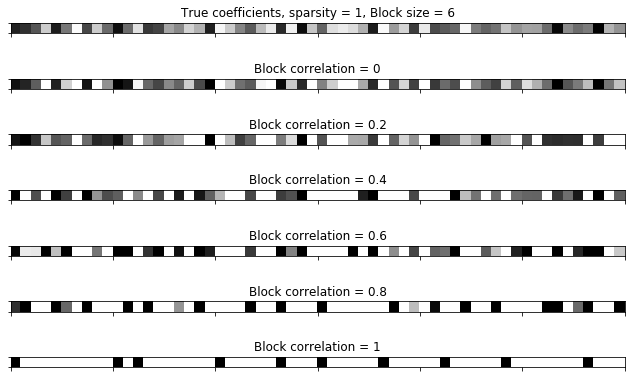

In [19]:
fig, ax = plt.subplots(7, 1, figsize=(11, 7))
# True beta
ax[0].set_aspect('equal')
ax[0].pcolor(en02.iloc[0].beta[1, :, np.newaxis].T, cmap='Greys', vmin = 0, vmax = 10)
ax[0].set_xticklabels([])
ax[0].set_yticklabels([])
ax[0].set_title('True coefficients, sparsity = 1, Block size = 6')

ax[1].set_aspect('equal')
ax[1].pcolor(en02.iloc[0].beta_hats[1, :, np.newaxis].T, cmap = 'Greys', vmin = 0, vmax = 10)
ax[1].set_xticklabels([])
ax[1].set_yticklabels([])
ax[1].set_title('Block correlation = 0')

ax[2].set_aspect('equal')
ax[2].pcolor(en02.iloc[1].beta_hats[1, :, np.newaxis].T, cmap = 'Greys', vmin = 0, vmax = 10)
ax[2].set_xticklabels([])
ax[2].set_yticklabels([])
ax[2].set_title('Block correlation = 0.2')

ax[3].set_aspect('equal')
ax[3].pcolor(en02.iloc[2].beta_hats[1, :, np.newaxis].T, cmap = 'Greys', vmin = 0, vmax = 10)
ax[3].set_xticklabels([])
ax[3].set_yticklabels([])
ax[3].set_title('Block correlation = 0.4')

ax[4].set_aspect('equal')
ax[4].pcolor(en02.iloc[3].beta_hats[1, :, np.newaxis].T, cmap = 'Greys', vmin = 0, vmax = 10)
ax[4].set_xticklabels([])
ax[4].set_yticklabels([])
ax[4].set_title('Block correlation = 0.6')

ax[5].set_aspect('equal')
ax[5].pcolor(en02.iloc[4].beta_hats[1, :, np.newaxis].T, cmap = 'Greys', vmin = 0, vmax = 10)
ax[5].set_xticklabels([])
ax[5].set_yticklabels([])
ax[5].set_title('Block correlation = 0.8')

ax[6].set_aspect('equal')
ax[6].pcolor(en02.iloc[5].beta_hats[1, :, np.newaxis].T, cmap = 'Greys', vmin = 0, vmax = 10)
ax[6].set_xticklabels([])
ax[6].set_yticklabels([])
ax[6].set_title('Block correlation = 1')

plt.savefig('selection_profile.png')

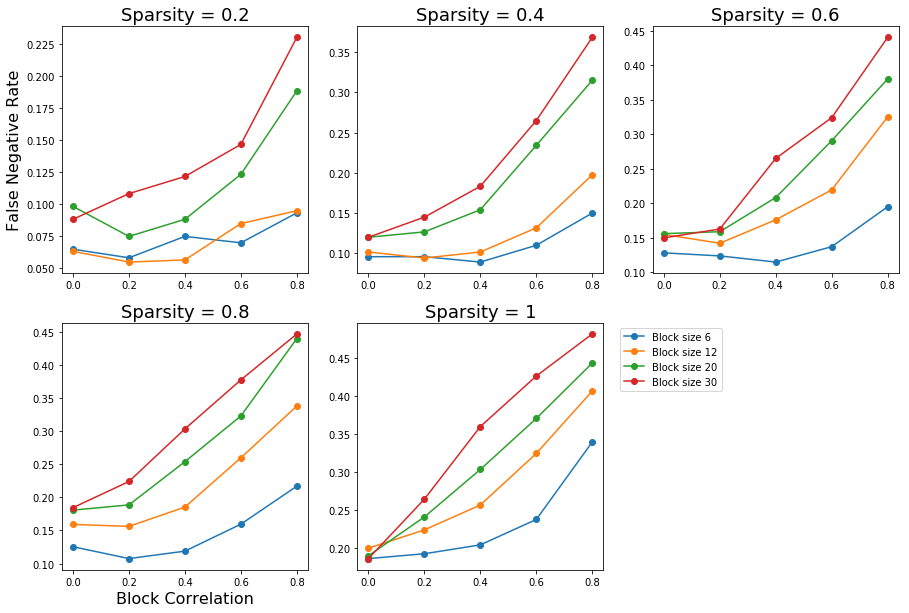

In [22]:
# False negative rate
# Stick to LST 1, make separate curves for each block size, and plot FNR as a function of correlation 

# Select the relevant data:
dat = []
dat.append(en2.loc[(en2['sparsity'] == 0.2) & (en2['sel_thres_min'] == 1)])
dat.append(en2.loc[(en['sparsity'] == 0.4) & (en2['sel_thres_min'] == 1)])
dat.append(en2.loc[(en['sparsity'] == 0.6) & (en2['sel_thres_min'] == 1)])
dat.append(en2.loc[(en['sparsity'] == 0.8) & (en2['sel_thres_min'] == 1)])
dat.append(en2.loc[(en['sparsity'] == 1) & (en2['sel_thres_min'] == 1)])

correlations = [0, 0.2, 0.4, 0.6, 0.8]
block_size = [6, 12, 20, 30]
sparsity = [0.2, 0.4, 0.6, 0.8, 1]
fig, ax = plt.subplots(2, 3, figsize = (15, 10))
for i, d in enumerate(dat):
    # Organize by block_size and correlations
    fn_avg = np.zeros((len(block_size), len(correlations)))
    for j, b in enumerate(block_size):
        for k, c in enumerate(correlations):
        # For each instance, average across repititions
            dd = d.loc[(d['correlation'] == c) & (d['block_size'] == b)]
            fn_avg[j, k] = np.mean(dd.fn.values[0])/(60 * sparsity[i])
    a = ax[np.unravel_index(i, (2, 3))]
    a.plot(correlations, fn_avg[0, :], '-o')
    a.plot(correlations, fn_avg[1, :], '-o')
    a.plot(correlations, fn_avg[2, :], '-o')
    a.plot(correlations, fn_avg[3, :], '-o')

fig.delaxes(ax[1, 2])
ax[np.unravel_index(0, (2, 3))].set_title('Sparsity = 0.2', fontsize=18)
ax[np.unravel_index(0, (2, 3))].set_ylabel('False Negative Rate', fontsize=16)
ax[np.unravel_index(1, (2, 3))].set_title('Sparsity = 0.4', fontsize=18)
ax[np.unravel_index(2, (2, 3))].set_title('Sparsity = 0.6', fontsize=18)
ax[np.unravel_index(3, (2, 3))].set_title('Sparsity = 0.8', fontsize=18)
ax[np.unravel_index(3, (2, 3))].set_xlabel('Block Correlation', fontsize=16)
ax[np.unravel_index(4, (2, 3))].set_title('Sparsity = 1', fontsize=18)
ax[np.unravel_index(4, (2, 3))].legend(['Block size 6', 'Block size 12', 'Block size 20', 'Block size 30'], loc = 'upper right', bbox_to_anchor=(1.5, 1))

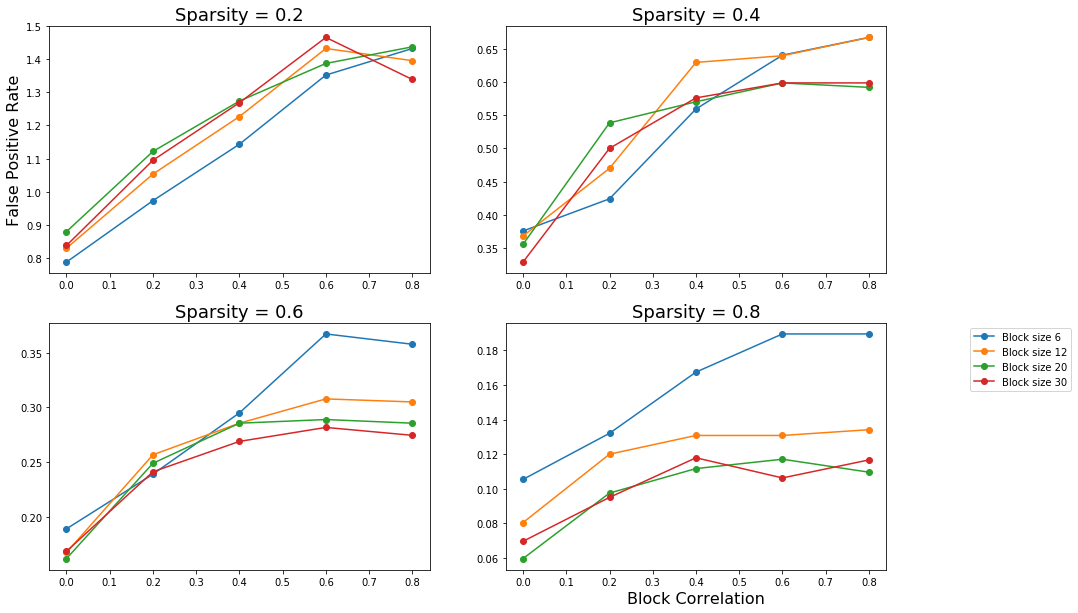

In [23]:
correlations = [0, 0.2, 0.4, 0.6, 0.8]
block_size = [6, 12, 20, 30]
sparsity = [0.2, 0.4, 0.6, 0.8]
fig, ax = plt.subplots(2, 2, figsize = (15, 10))
for i, s in enumerate(sparsity):
    d = dat[i]
    # Organize by block_size and correlations
    fn_avg = np.zeros((len(block_size), len(correlations)))
    fp_avg = np.zeros((len(block_size), len(correlations)))
    for j, b in enumerate(block_size):
        for k, c in enumerate(correlations):
        # For each instance, average across repititions
            dd = d.loc[(d['correlation'] == c) & (d['block_size'] == b)]
            fp_avg[j, k] = np.mean(dd.fp.values[0])/(60 * s)
    a = ax[np.unravel_index(i, (2, 2))]
    a.plot(correlations, fp_avg[0, :], '-o')
    a.plot(correlations, fp_avg[1, :], '-o')
    a.plot(correlations, fp_avg[2, :], '-o')
    a.plot(correlations, fp_avg[3, :], '-o')            
    
ax[np.unravel_index(0, (2, 2))].set_title('Sparsity = 0.2', fontsize=18)
ax[np.unravel_index(0, (2, 2))].set_ylabel('False Positive Rate', fontsize=16)
ax[np.unravel_index(1, (2, 2))].set_title('Sparsity = 0.4', fontsize=18)
ax[np.unravel_index(2, (2, 2))].set_title('Sparsity = 0.6', fontsize=18)
ax[np.unravel_index(3, (2, 2))].set_title('Sparsity = 0.8', fontsize=18)
ax[np.unravel_index(3, (2, 2))].set_xlabel('Block Correlation', fontsize=16)
ax[np.unravel_index(3, (2, 2))].legend(['Block size 6', 'Block size 12', 'Block size 20', 'Block size 30'], loc = 'upper right', bbox_to_anchor=(1.5, 1))
plt.savefig('FalsePositiveRate.png')

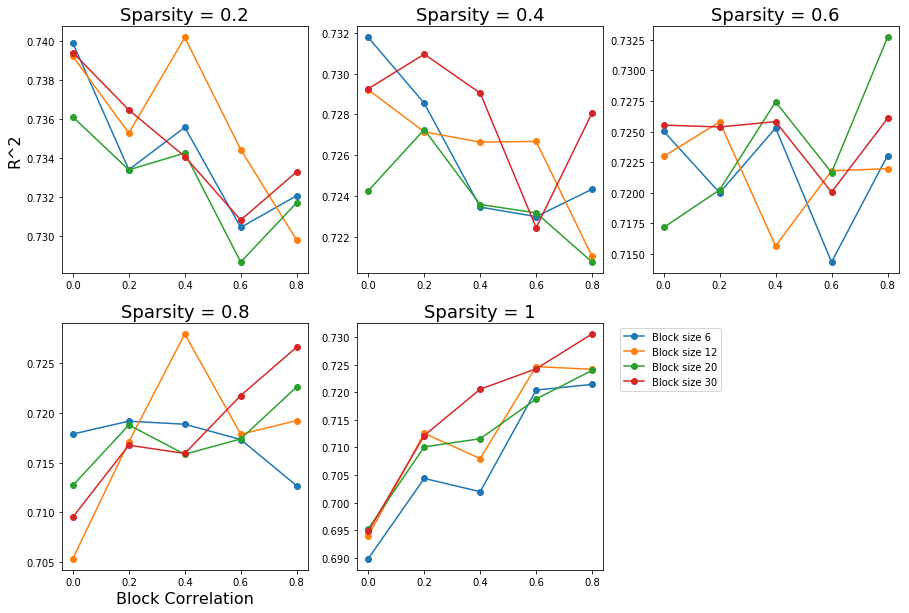

In [24]:
correlations = [0, 0.2, 0.4, 0.6, 0.8]
block_size = [6, 12, 20, 30]
sparsity = [0.2, 0.4, 0.6, 0.8, 1]
fig, ax = plt.subplots(2, 3, figsize = (15, 10))
for i, d in enumerate(dat):
    # Organize by block_size and correlations
    fn_avg = np.zeros((len(block_size), len(correlations)))
    fp_avg = np.zeros((len(block_size), len(correlations)))
    for j, b in enumerate(block_size):
        for k, c in enumerate(correlations):
        # For each instance, average across repititions
            dd = d.loc[(d['correlation'] == c) & (d['block_size'] == b)]
            fp_avg[j, k] = np.mean(dd.r2.values[0])
    a = ax[np.unravel_index(i, (2, 3))]
    a.plot(correlations, fp_avg[0, :], '-o')
    a.plot(correlations, fp_avg[1, :], '-o')
    a.plot(correlations, fp_avg[2, :], '-o')
    a.plot(correlations, fp_avg[3, :], '-o')            
    
fig.delaxes(ax[1, 2])
ax[np.unravel_index(0, (2, 3))].set_title('Sparsity = 0.2', fontsize=18)
ax[np.unravel_index(0, (2, 3))].set_ylabel('R^2', fontsize=16)
ax[np.unravel_index(1, (2, 3))].set_title('Sparsity = 0.4', fontsize=18)
ax[np.unravel_index(2, (2, 3))].set_title('Sparsity = 0.6', fontsize=18)
ax[np.unravel_index(3, (2, 3))].set_title('Sparsity = 0.8', fontsize=18)
ax[np.unravel_index(3, (2, 3))].set_xlabel('Block Correlation', fontsize=16)
ax[np.unravel_index(4, (2, 3))].set_title('Sparsity = 1', fontsize=18)
ax[np.unravel_index(4, (2, 3))].legend(['Block size 6', 'Block size 12', 'Block size 20', 'Block size 30'], loc = 'upper right', bbox_to_anchor=(1.5, 1))
plt.savefig('R2.png')

In [9]:
from utils import cluster_dist

In [11]:
x = cluster_dist(0, 10, 5, 1, 100)

TypeError: 'int' object is not iterable